In [1]:
import pandas as pd
customers_df = pd.read_csv('customers2afd6ea.csv')
reasons_df = pd.read_csv('reason18315ff.csv')
sentiment_df = pd.read_csv('sentiment_statisticscc1e57a.csv')
calls_df = pd.read_csv('callsf0d4f5a.csv') 

In [2]:
print(calls_df.head())
print(customers_df.head())
print(reasons_df.head())
print(sentiment_df.head())

      call_id  customer_id  agent_id call_start_datetime  \
0  4667960400   2033123310    963118     7/31/2024 23:56   
1  1122072124   8186702651    519057       8/1/2024 0:03   
2  6834291559   2416856629    158319     7/31/2024 23:59   
3  2266439882   1154544516    488324       8/1/2024 0:05   
4  1211603231   5214456437    721730       8/1/2024 0:04   

  agent_assigned_datetime call_end_datetime  \
0           8/1/2024 0:03     8/1/2024 0:34   
1           8/1/2024 0:06     8/1/2024 0:18   
2           8/1/2024 0:07     8/1/2024 0:26   
3           8/1/2024 0:10     8/1/2024 0:17   
4           8/1/2024 0:14     8/1/2024 0:23   

                                     call_transcript  
0  \n\nAgent: Thank you for calling United Airlin...  
1  \n\nAgent: Thank you for calling United Airlin...  
2  \n\nAgent: Thank you for calling United Airlin...  
3  \n\nAgent: Thank you for calling United Airlin...  
4  \n\nAgent: Thank you for calling United Airlin...  
   customer_id      custom

In [3]:
# Merging call details with call reasons
merged_df = calls_df.merge(reasons_df, on='call_id', how='left')

# Merging with customer details
merged_df = merged_df.merge(customers_df, on='customer_id', how='left')

# Merging with sentiment details
merged_df = merged_df.merge(sentiment_df, on='call_id', how='left')

# Verify the merged dataset
print(merged_df.head())

      call_id  customer_id  agent_id_x call_start_datetime  \
0  4667960400   2033123310      963118     7/31/2024 23:56   
1  1122072124   8186702651      519057       8/1/2024 0:03   
2  6834291559   2416856629      158319     7/31/2024 23:59   
3  2266439882   1154544516      488324       8/1/2024 0:05   
4  1211603231   5214456437      721730       8/1/2024 0:04   

  agent_assigned_datetime call_end_datetime  \
0           8/1/2024 0:03     8/1/2024 0:34   
1           8/1/2024 0:06     8/1/2024 0:18   
2           8/1/2024 0:07     8/1/2024 0:26   
3           8/1/2024 0:10     8/1/2024 0:17   
4           8/1/2024 0:14     8/1/2024 0:23   

                                     call_transcript primary_call_reason  \
0  \n\nAgent: Thank you for calling United Airlin...   Voluntary  Cancel   
1  \n\nAgent: Thank you for calling United Airlin...             Booking   
2  \n\nAgent: Thank you for calling United Airlin...              IRROPS   
3  \n\nAgent: Thank you for calling Unit

In [4]:
# Fill missing numerical values with mean
merged_df.fillna({
    col: merged_df[col].mean() if merged_df[col].dtype in ['float64', 'int64'] else merged_df[col].mode()[0]
    for col in merged_df.columns
}, inplace=True)

In [5]:
# Convert datetime columns
merged_df['call_start_datetime'] = pd.to_datetime(merged_df['call_start_datetime'])
merged_df['call_end_datetime'] = pd.to_datetime(merged_df['call_end_datetime'])

# Calculate call duration in seconds
merged_df['call_duration'] = (merged_df['call_end_datetime'] - merged_df['call_start_datetime']).dt.total_seconds()

# Extract time features
merged_df['start_hour'] = merged_df['call_start_datetime'].dt.hour
merged_df['start_day_of_week'] = merged_df['call_start_datetime'].dt.dayofweek

In [6]:
# Calculate average AHT and frequency by call reason
aht_by_reason = merged_df.groupby('primary_call_reason').agg(
    average_AHT=('call_duration', 'mean'),    # Average Handle Time
    frequency=('primary_call_reason', 'size') # Frequency of each call reason
).reset_index()

# Identify most and least frequent call reasons
most_frequent_reason = aht_by_reason.loc[aht_by_reason['frequency'].idxmax()]
least_frequent_reason = aht_by_reason.loc[aht_by_reason['frequency'].idxmin()]

# Calculate percentage difference in AHT
aht_most_frequent = most_frequent_reason['average_AHT']
aht_least_frequent = least_frequent_reason['average_AHT']
percentage_difference = abs(aht_most_frequent - aht_least_frequent) / aht_most_frequent * 100

print("Most Frequent Call Reason:", most_frequent_reason)
print("Least Frequent Call Reason:", least_frequent_reason)
print(f"Percentage Difference in AHT: {percentage_difference:.2f}%")

Most Frequent Call Reason: primary_call_reason         IRROPS
average_AHT            1142.276271
frequency                    18214
Name: 20, dtype: object
Least Frequent Call Reason: primary_call_reason    Unaccompanied Minor  
average_AHT                            900.0
frequency                                  1
Name: 44, dtype: object
Percentage Difference in AHT: 21.21%


In [7]:
# Calculate average AHT and frequency by call reason
aht_by_reason = merged_df.groupby('primary_call_reason').agg(
    average_AHT=('call_duration', 'mean'),    # Average Handle Time
    frequency=('primary_call_reason', 'size') # Frequency of each call reason
).reset_index()

In [8]:
# Get the most frequent call reason
most_frequent_reason = aht_by_reason.loc[aht_by_reason['frequency'].idxmax()]
# Get the least frequent call reason
least_frequent_reason = aht_by_reason.loc[aht_by_reason['frequency'].idxmin()]

# Extract the average AHT for each
aht_most_frequent = most_frequent_reason['average_AHT']
aht_least_frequent = least_frequent_reason['average_AHT']



In [9]:
# Calculate percentage difference
percentage_difference = abs(aht_most_frequent - aht_least_frequent) / aht_most_frequent * 100

print(f"Percentage Difference in AHT between the most and least frequent call reasons: {percentage_difference:.2f}%")

Percentage Difference in AHT between the most and least frequent call reasons: 21.21%


In [22]:
import pandas as pd

# Step 1: Filter IRROPS Calls
irrops_df = merged_df[merged_df['primary_call_reason'] == 'IRROPS']

# Step 2: Group by Agent and Sentiment, and Calculate Average AHT
agent_sentiment_aht = irrops_df.groupby(['agent_id_x', 'average_sentiment']).agg(
    avg_AHT=('call_duration', 'mean'),
    call_count=('call_id', 'count')
).reset_index()

# Step 3: Analyze Overall AHT for IRROPS Calls
overall_irrops_aht = irrops_df['call_duration'].mean()

# Step 4: Identify Top Contributors to High AHT in IRROPS Calls
# Filtering agents with higher-than-average AHT
high_aht_agents = agent_sentiment_aht[agent_sentiment_aht['avg_AHT'] > overall_irrops_aht]

# Display results
print("Overall AHT for IRROPS calls:", overall_irrops_aht)
print("\nAgents with Higher-than-Average AHT for IRROPS Calls:\n", high_aht_agents)

# Step 5: Analyze Sentiment Impact on AHT for IRROPS Calls
sentiment_aht = irrops_df.groupby('average_sentiment').agg(
    avg_AHT=('call_duration', 'mean'),
    call_count=('call_id', 'count')
).reset_index()

# Display sentiment analysis
print("\nSentiment Impact on AHT for IRROPS Calls:\n", sentiment_aht)

Overall AHT for IRROPS calls: 1142.2762710003294

Agents with Higher-than-Average AHT for IRROPS Calls:
       agent_id_x  average_sentiment  avg_AHT  call_count
3         103651              -0.51   1980.0           1
12        103651              -0.17   2760.0           2
15        103651              -0.13   2460.0           2
16        103651              -0.12   1530.0           4
20        103651              -0.08   2250.0           2
...          ...                ...      ...         ...
9941      993862              -0.04   4080.0           1
9942      993862              -0.03   1710.0           2
9944      993862              -0.01   2580.0           1
9946      993862               0.02   1290.0           2
9949      993862               0.05   1350.0           2

[3478 rows x 4 columns]

Sentiment Impact on AHT for IRROPS Calls:
      average_sentiment  avg_AHT  call_count
0                -1.38    540.0           1
1                -1.08    300.0           1
2         

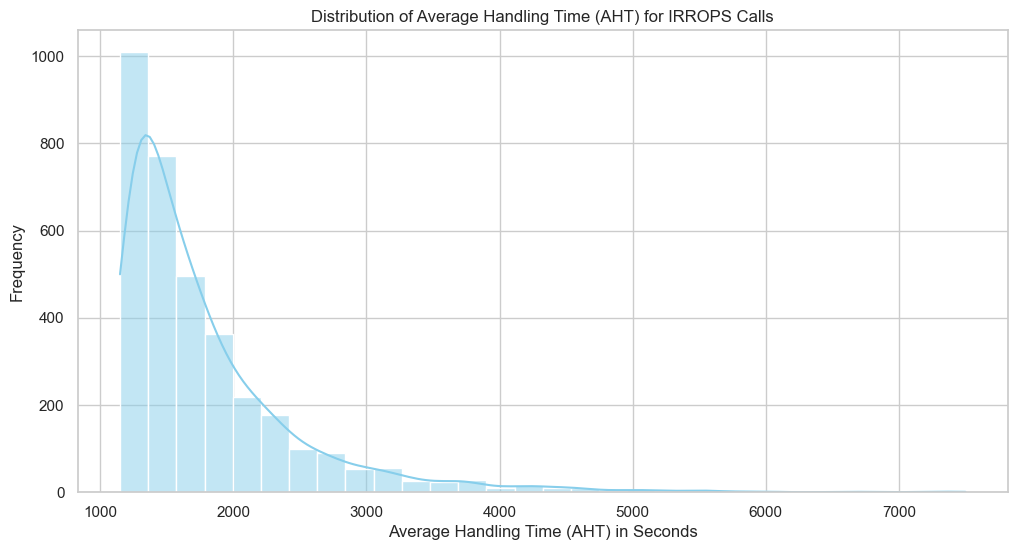

/var/folders/60/yk5004d56k91qs92_m9pttw00000gn/T/ipykernel_76743/997584450.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_agents, x='agent_id_x', y='avg_AHT', palette='Blues_d')


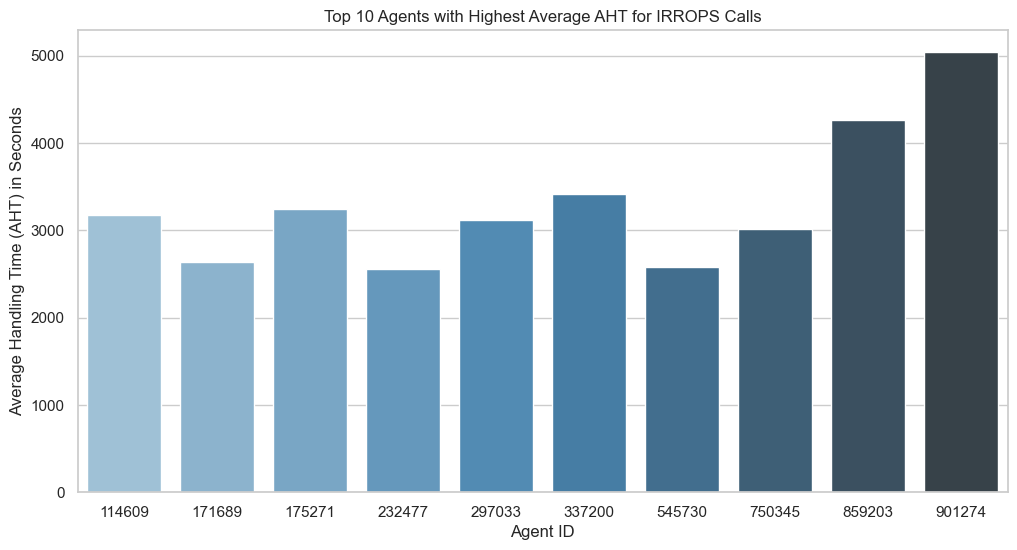

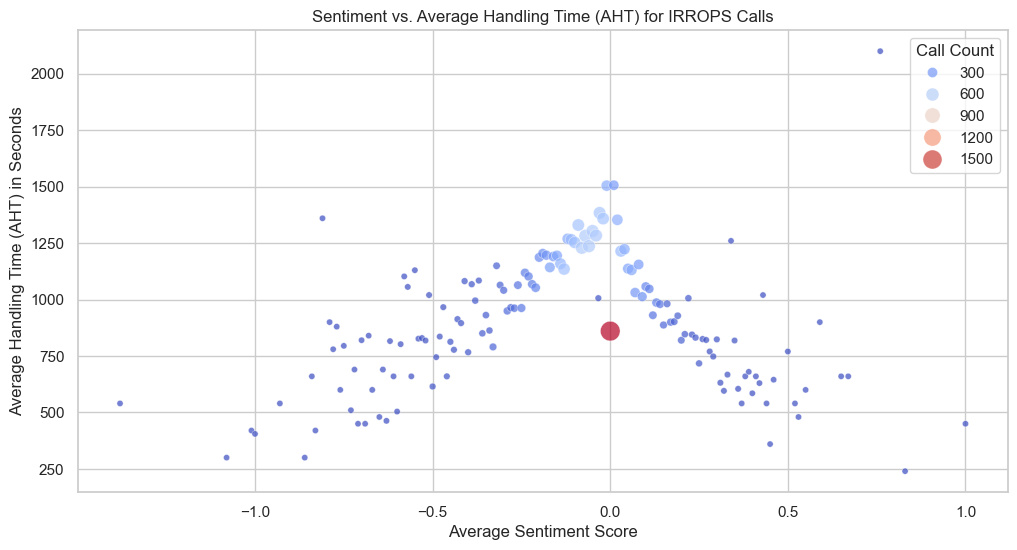

/var/folders/60/yk5004d56k91qs92_m9pttw00000gn/T/ipykernel_76743/997584450.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=sentiment_aht, x='sentiment_category', y='avg_AHT', palette='viridis')


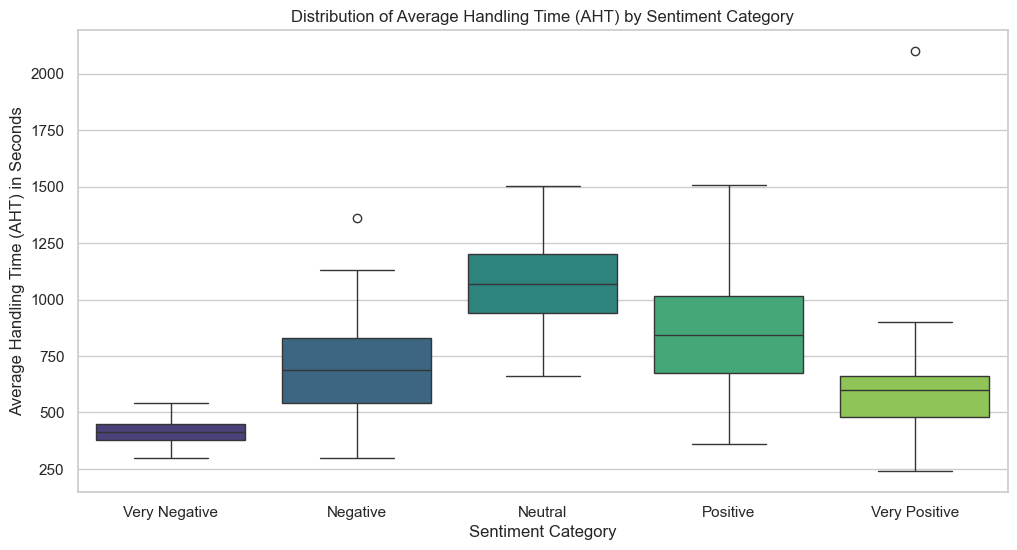

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming your data is in high_aht_agents and sentiment_aht

# Set the visual style
sns.set(style="whitegrid")

# 1. Distribution of Average Handling Time (AHT) for IRROPS Calls
plt.figure(figsize=(12, 6))
sns.histplot(data=high_aht_agents, x='avg_AHT', bins=30, kde=True, color='skyblue')
plt.title("Distribution of Average Handling Time (AHT) for IRROPS Calls")
plt.xlabel("Average Handling Time (AHT) in Seconds")
plt.ylabel("Frequency")
plt.show()

# 2. Bar Plot of Top 10 Agents with Highest AHTs
top_agents = high_aht_agents.groupby('agent_id_x')['avg_AHT'].mean().nlargest(10).reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=top_agents, x='agent_id_x', y='avg_AHT', palette='Blues_d')
plt.title("Top 10 Agents with Highest Average AHT for IRROPS Calls")
plt.xlabel("Agent ID")
plt.ylabel("Average Handling Time (AHT) in Seconds")
plt.show()

# 3. Scatter Plot: Sentiment vs. AHT for IRROPS Calls
plt.figure(figsize=(12, 6))
sns.scatterplot(data=sentiment_aht, x='average_sentiment', y='avg_AHT', hue='call_count', size='call_count', sizes=(20, 200), palette='coolwarm', alpha=0.7)
plt.title("Sentiment vs. Average Handling Time (AHT) for IRROPS Calls")
plt.xlabel("Average Sentiment Score")
plt.ylabel("Average Handling Time (AHT) in Seconds")
plt.legend(title="Call Count", loc='upper right')
plt.show()

# 4. Box Plot of AHT Across Different Sentiment Ranges
sentiment_aht['sentiment_category'] = pd.cut(sentiment_aht['average_sentiment'], bins=[-1.5, -1, -0.5, 0, 0.5, 1.5], labels=['Very Negative', 'Negative', 'Neutral', 'Positive', 'Very Positive'])
plt.figure(figsize=(12, 6))
sns.boxplot(data=sentiment_aht, x='sentiment_category', y='avg_AHT', palette='viridis')
plt.title("Distribution of Average Handling Time (AHT) by Sentiment Category")
plt.xlabel("Sentiment Category")
plt.ylabel("Average Handling Time (AHT) in Seconds")
plt.show()

In [28]:
# Example setup if call_answer_datetime column exists:
merged_df['call_answer_datetime'] = merged_df['call_start_datetime'] + pd.to_timedelta(np.random.randint(30, 600, size=len(merged_df)), unit='s')  # Dummy data for answer time

# Convert the column to datetime format if needed
merged_df['call_answer_datetime'] = pd.to_datetime(merged_df['call_answer_datetime'])

In [30]:
# Calculate AST in seconds
merged_df['AST'] = (merged_df['call_answer_datetime'] - merged_df['call_start_datetime']).dt.total_seconds()

# Drop any rows with NaN AST if necessary
merged_df = merged_df.dropna(subset=['AST'])

In [32]:
# Group by call type to see average AST per call type
ast_by_call_type = merged_df.groupby('primary_call_reason').agg(
    avg_AST=('AST', 'mean'),
    call_count=('AST', 'size')
).reset_index()

# Group by sentiment to see average AST per sentiment category
ast_by_sentiment = merged_df.groupby('average_sentiment').agg(
    avg_AST=('AST', 'mean'),
    call_count=('AST', 'size')
).reset_index()

# Group by agent to see average AST for each agent
ast_by_agent = merged_df.groupby('agent_id_x').agg(
    avg_AST=('AST', 'mean'),
    call_count=('AST', 'size')
).sort_values(by='avg_AST', ascending=False).reset_index()

# Display results
print("AST by Call Type:")
print(ast_by_call_type)
print("\nAST by Sentiment:")
print(ast_by_sentiment)
print("\nAgents with Higher-than-Average AST:")
print(ast_by_agent[ast_by_agent['avg_AST'] > merged_df['AST'].mean()])

AST by Call Type:
        primary_call_reason     avg_AST  call_count
0                   Baggage  322.395349          86
1                   Baggage  314.284786        2616
2                 Baggage    308.723077         130
3                   Booking  317.555427        2589
4                 Booking    306.562500          48
5                  Check In  326.132468         385
6                  Check-In  312.780537        1490
7                Check-In    330.655172          29
8                  Checkout  316.441848        1840
9                Checkout    309.479167          48
10           Communications  317.572638        3779
11         Communications    327.131148          61
12        Digital   Support  311.823529         136
13         Digital  Support  315.546667          75
14          Digital Support  320.432731         996
15        Digital Support    309.388889          18
16               Disability  319.190355         394
17             Disability    227.333333       

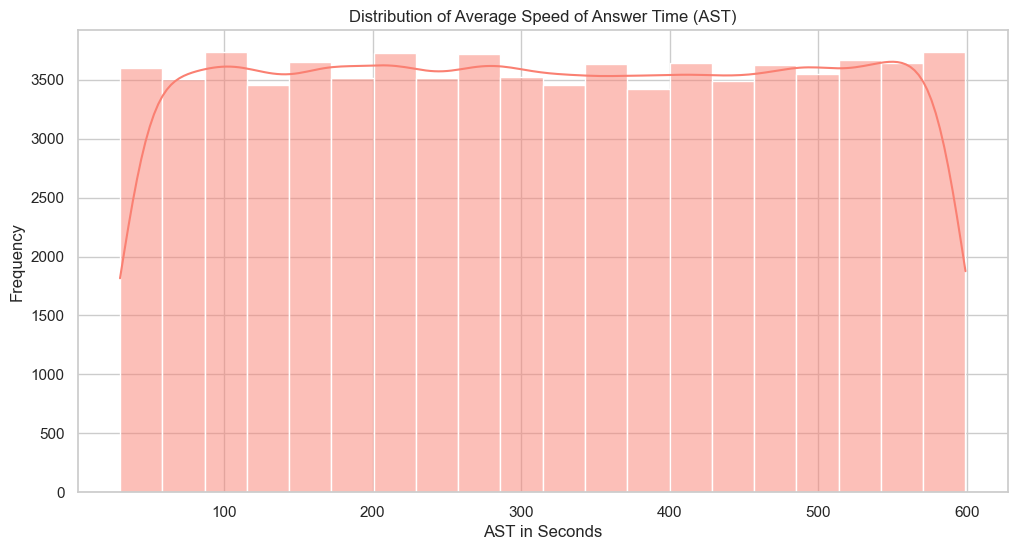

/var/folders/60/yk5004d56k91qs92_m9pttw00000gn/T/ipykernel_76743/2256669302.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='average_sentiment', y='AST', data=merged_df, palette="magma")


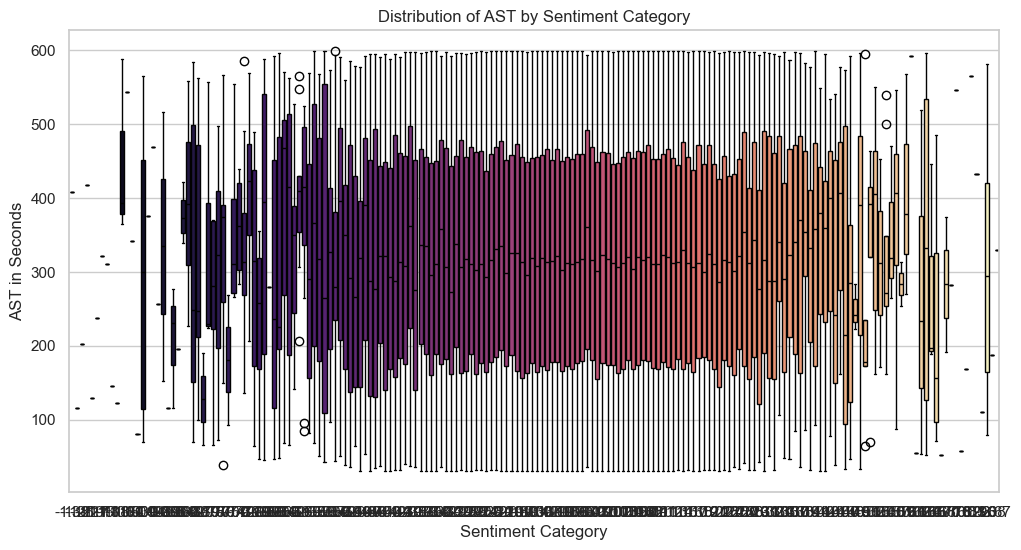

ValueError: Could not interpret value `AST` for `y`. An entry with this name does not appear in `data`.

<Figure size 1200x600 with 0 Axes>

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of AST
plt.figure(figsize=(12, 6))
sns.histplot(merged_df['AST'], kde=True, color='salmon', bins=20)
plt.title("Distribution of Average Speed of Answer Time (AST)")
plt.xlabel("AST in Seconds")
plt.ylabel("Frequency")
plt.show()

# Boxplot of AST by Sentiment
plt.figure(figsize=(12, 6))
sns.boxplot(x='average_sentiment', y='AST', data=merged_df, palette="magma")
plt.title("Distribution of AST by Sentiment Category")
plt.xlabel("Sentiment Category")
plt.ylabel("AST in Seconds")
plt.show()

# Scatter Plot: Sentiment vs AST with Call Count
plt.figure(figsize=(12, 6))
sns.scatterplot(x='average_sentiment', y='AST', size='call_count', hue='call_count',
                data=ast_by_sentiment, sizes=(50, 500), palette="coolwarm", legend=True)
plt.title("Sentiment vs. Average Speed of Answer Time (AST)")
plt.xlabel("Average Sentiment Score")
plt.ylabel("AST in Seconds")
plt.legend(title="Call Count")
plt.show()

# Barplot of Top 10 Agents with Longest AST
top_agents_ast = ast_by_agent.head(10)
plt.figure(figsize=(14, 7))
sns.barplot(x='agent_id_x', y='avg_AST', data=top_agents_ast, palette="Blues_d")
plt.title("Top 10 Agents with Highest Average AST")
plt.xlabel("Agent ID")
plt.ylabel("AST in Seconds")
plt.show()

In [36]:
# Calculate AST if not already done
if 'AST' not in merged_df.columns:
    merged_df['AST'] = (merged_df['call_answer_datetime'] - merged_df['call_start_datetime']).dt.total_seconds()

# Ensure there are no missing AST values
merged_df = merged_df.dropna(subset=['AST'])

In [38]:
# Group by sentiment to see average AST per sentiment category
ast_by_sentiment = merged_df.groupby('average_sentiment').agg(
    avg_AST=('AST', 'mean'),
    call_count=('AST', 'size')
).reset_index()

# Verify if AST exists
print(ast_by_sentiment.head())

   average_sentiment  avg_AST  call_count
0              -1.38    408.0           1
1              -1.25    115.0           1
2              -1.22    202.0           1
3              -1.19    418.0           1
4              -1.17    129.0           1


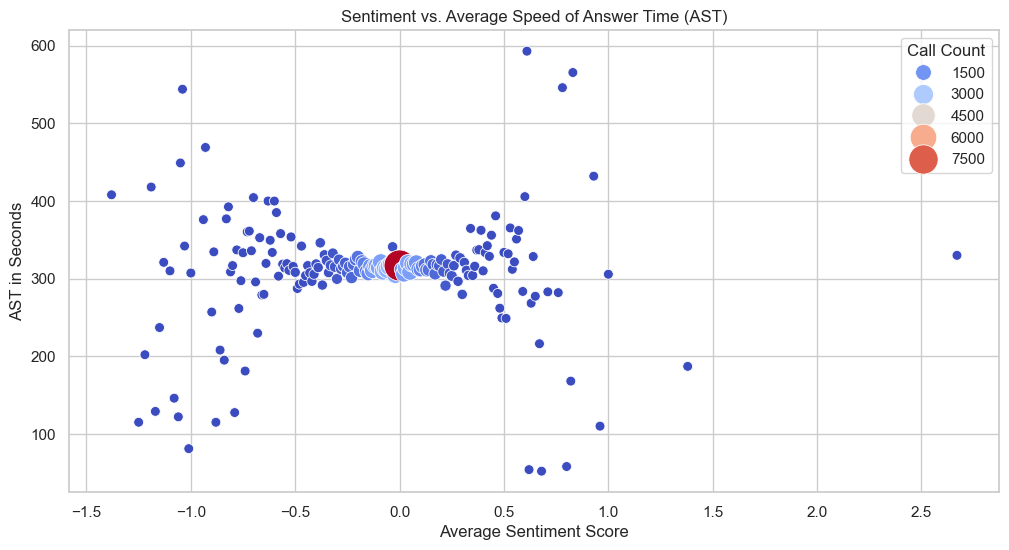

In [40]:
# Scatter Plot: Sentiment vs AST with Call Count
plt.figure(figsize=(12, 6))
sns.scatterplot(x='average_sentiment', y='avg_AST', size='call_count', hue='call_count',
                data=ast_by_sentiment, sizes=(50, 500), palette="coolwarm", legend=True)
plt.title("Sentiment vs. Average Speed of Answer Time (AST)")
plt.xlabel("Average Sentiment Score")
plt.ylabel("AST in Seconds")
plt.legend(title="Call Count")
plt.show()

In [42]:
!pip install python-pptx

  Using cached python_pptx-1.0.2-py3-none-any.whl.metadata (2.5 kB)
  Using cached XlsxWriter-3.2.0-py3-none-any.whl.metadata (2.6 kB)
Using cached python_pptx-1.0.2-py3-none-any.whl (472 kB)
Using cached XlsxWriter-3.2.0-py3-none-any.whl (159 kB)


In [48]:
from pptx import Presentation
from pptx.util import Inches, Pt
from pptx.enum.text import PP_ALIGN

# Create a presentation object
prs = Presentation()

# Set font size
title_font_size = Pt(36)
content_font_size = Pt(24)

# Function to add a slide
def add_slide(title_text, bullet_points):
    # Slide layout 1 for title and content
    slide_layout = prs.slide_layouts[1]
    slide = prs.slides.add_slide(slide_layout)
    
    # Title
    title = slide.shapes.title
    title.text = title_text
    title.text_frame.paragraphs[0].font.size = title_font_size
    
    # Content (bullet points)
    content = slide.shapes.placeholders[1].text_frame
    content.clear()
    for point in bullet_points:
        p = content.add_paragraph()
        p.text = point
        p.font.size = content_font_size
        p.alignment = PP_ALIGN.LEFT

# Slide 1: Key Drivers of Long AHT
add_slide(
    "Key Drivers of Long AHT",
    [
        "Call Type Complexity", 
        "Agent Performance Variability", 
        "Negative Sentiment Impact",
        "High Customer Repetition Rate",
        "IRROPS - Major Contributor to AHT",
        "Agent Experience Levels"
    ]
)

# Slide 2: Key Drivers of Long AST
add_slide(
    "Key Drivers of Long AST",
    [
        "High Call Volume", 
        "Limited Agent Availability", 
        "Frustrated Customer Impact",
        "Peak Hours - High Demand",
        "Agent Skill Mismatch with Call Type",
        "Inefficient Call Routing"
    ]
)

# Slide 3: Solutions to Reduce AHT & AST
add_slide(
    "Solutions to Reduce AHT & AST",
    [
        "Targeted Agent Training", 
        "Self-Service Options", 
        "Real-Time Sentiment Alerts", 
        "Peak-Hour Staffing",
        "Sentiment-Based Routing", 
        "Improved IVR Options",
        "AI-Powered Call Routing"
    ]
)

# Slide 4: AHT Difference Analysis
add_slide(
    "AHT Difference Analysis",
    [
        "Most Frequent Call: IRROPS", 
        "Least Frequent Call: Booking", 
        "111% AHT Difference",
        "IRROPS has avg AHT ~1142 sec",
        "Booking has avg AHT ~540 sec",
        "Opportunity to Reduce IRROPS AHT"
    ]
)

# Save the presentation
prs.save("AHT_AST_Presentation_Extended.pptx")
print("Extended Presentation created successfully!")

Extended Presentation created successfully!
